Surface Area ≈ 1.959
Edge Length ≈ 6.297


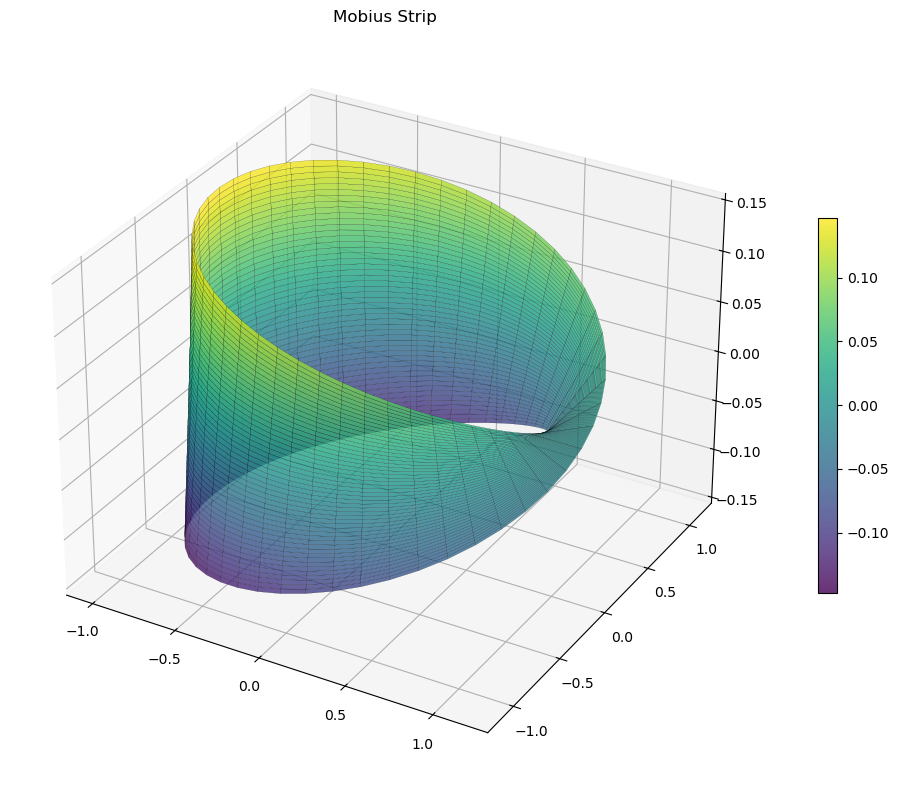

In [4]:
#Numerical python for numerical operation i.e..meshgrid
import numpy as np 

# matplotlib 3D plotting toolkit for 3D surfaces
from mpl_toolkits.mplot3d import Axes3D

# matplotlib for plotting the figure and it's  properties
import matplotlib.pyplot as plt 

class MobiusStrip:
    #The Mobius strip is a mathematical surface with only one side and one boundary
    def __init__(self, r=1.0, w=0.2, res=100):
        self.r = r
        self.w = w
        self.res = res
        self.u = np.linspace(0, 2 * np.pi, res) # u ∈ [0, 2π]
        self.v = np.linspace(-w / 2, w / 2, res) # v ∈ [-w/2, w/2]
        self.U, self.V = np.meshgrid(self.u, self.v)

        self.X, self.Y, self.Z = self.to_generate_coordinates()

    def to_generate_coordinates(self):
        U = self.U
        V = self.V
        r = self.r

        #Compute 3D coordinates using parametric equations
        X = (r+ V * np.cos(U / 2)) * np.cos(U)
        Y = (r+ V * np.cos(U / 2)) * np.sin(U)
        Z = V * np.sin(U / 2)

        return X, Y, Z


    def surface_area(self):
        #Calculating the Approximate surface area of the Möbius strip using numerical integration.
        du = (2 * np.pi) / (self.res - 1)
        dv = self.w / (self.res - 1)

        # Partial derivatives
        Xu = np.gradient(self.X, du, axis=1)
        Xv = np.gradient(self.X, dv, axis=0)
        Yu = np.gradient(self.Y, du, axis=1)
        Yv = np.gradient(self.Y, dv, axis=0)
        Zu = np.gradient(self.Z, du, axis=1)
        Zv = np.gradient(self.Z, dv, axis=0)

        # Cross product of partial derivatives
        cross_x = Yu * Zv - Zu * Yv
        cross_y = Zu * Xv - Xu * Zv
        cross_z = Xu * Yv - Yu * Xv

        dA = np.sqrt(cross_x**2 + cross_y**2 + cross_z**2)
        area = np.sum(dA) * du * dv
        return area

    def edge_length(self):
        #Calculating the Approximate  edge length of the Möbius strip along the outer edge v.
        # v = w/2
        edge_x = self.X[-1, :]
        edge_y = self.Y[-1, :]
        edge_z = self.Z[-1, :]

        # Finding the distances between consecutive edge points
        dx = np.diff(edge_x)
        dy = np.diff(edge_y)
        dz = np.diff(edge_z)

        # calculating the Euclidean Distance
        segment_lengths = np.sqrt(dx**2 + dy**2 + dz**2)
        length = np.sum(segment_lengths) #sum of segment lengths
        return length

    def plot(self):
        #Plotting the 3D Möbius strip using matplotlib.
        fig = plt.figure(figsize=(12, 8))
        ax = fig.add_subplot(111, projection='3d')
        
        surface=ax.plot_surface(self.X, self.Y, self.Z, 
            alpha=0.8,
            cmap='viridis',
            linewidth=0.1,
            edgecolors='black')
        
        ax.set_title("Mobius Strip")
        plt.colorbar(surface, shrink=0.5, aspect=20)# Colorbar for surface
        plt.tight_layout()
        plt.show()



if __name__ == "__main__":
    mobius = MobiusStrip(r=1.0, w=0.3, res=50)#example use case
    print(f"Surface Area ≈ {mobius.surface_area():.3f}")
    print(f"Edge Length ≈ {mobius.edge_length():.3f}")
    mobius.plot()
